In [1]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# 한글설정
sns.set(style='white', rc={'figure.figsize':(12,3)})
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# 다른 폰트를 기본 폰트로 하려면
from matplotlib.font_manager import FontProperties
font_path = 'C:/Windows/Fonts/batang.ttc'
font_prop = FontProperties(fname=font_path, size=10)
# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
df_first = pd.read_csv('/ai/downloads/shareData/부동산/전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
                      encoding='euc-kr')

In [4]:
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [8]:
df_first_heat = df_first.set_index('지역')
df_first_heat.sample(3)

,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,2014년9월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
지역,,,,,,,,,,,,,,,,,,,,,
충북,6589,6589,6611,6625,6678,6598,6587,6586,6586,6584,...,6724,6743,6749,6747,6783,6790,6805,6682,6601,6603
전북,6282,6281,5946,5966,6277,6306,6351,6319,6436,6719,...,6583,6583,6583,6583,6542,6551,6556,6601,6750,6580
부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,9258,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581


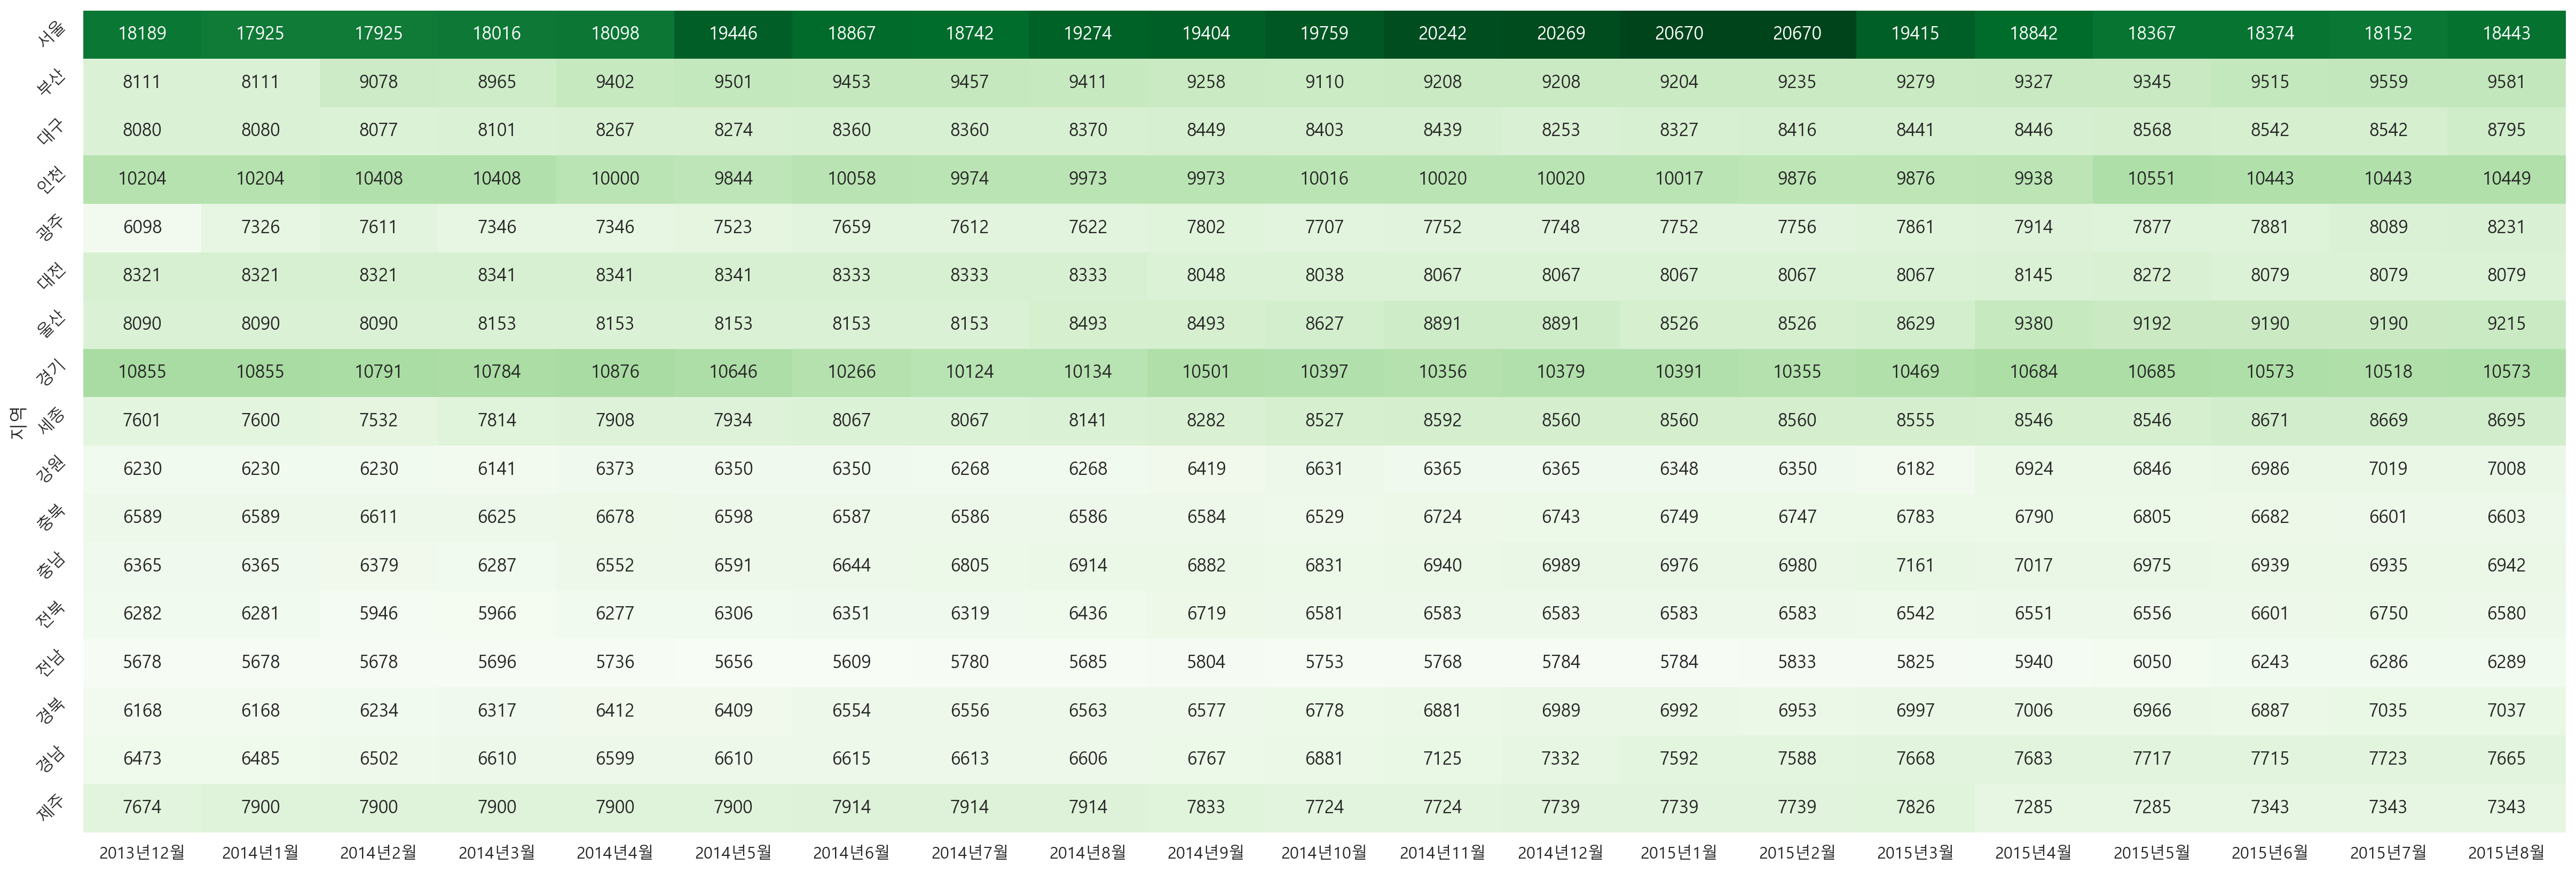

In [19]:
# 문제1)
plt.figure(figsize=(30,10))
sns.heatmap(df_first_heat, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.yticks(rotation=45)
plt.show()

In [20]:
# 문제2)
df_last = pd.read_csv('/ai/downloads/shareData/부동산/주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20241231.csv',
                      encoding='euc-kr')

In [21]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터)
0,서울,모든면적,2015,10,5841
1,서울,전용면적 60제곱미터이하,2015,10,5652
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721
4,서울,전용면적 102제곱미터초과,2015,10,5879


In [22]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   지역명         9095 non-null   object
 1   규모구분        9095 non-null   object
 2   연도          9095 non-null   int64 
 3   월           9095 non-null   int64 
 4   분양가격(제곱미터)  8481 non-null   object
dtypes: int64(2), object(3)
memory usage: 355.4+ KB


In [23]:
df_last.isna().sum()

지역명             0
규모구분            0
연도              0
월               0
분양가격(제곱미터)    614
dtype: int64

In [35]:
# 숫자 변환 여부 체크
pd.to_numeric(df_last['분양가격(제곱미터)'], 
              errors='coerce').isna().sum()

744

In [33]:
# 분양가격에 ,가 있는 경우 --> 4건
df_last[df_last['분양가격(제곱미터)'].notna() &
    (df_last['분양가격(제곱미터)'].str.find(',')!=-1) ]

,지역명,규모구분,연도,월,분양가격(제곱미터)
80,제주,모든면적,2015,10,"2,232"
82,제주,전용면적 60제곱미터초과 85제곱미터이하,2015,10,"2,225"
83,제주,전용면적 85제곱미터초과 102제곱미터이하,2015,10,"2,583"
84,제주,전용면적 102제곱미터초과,2015,10,"2,574"


In [36]:
# 공백체크 --> 126건
df_last.loc[df_last['분양가격(제곱미터)'].str.strip() == '', 
            '지역명'].value_counts().sum()

126

In [38]:
def pdrop(row):
    row = row.copy()
    pp = row['분양가격(제곱미터)']
    if pp is np.nan:
        pass
    elif pp.strip() == '': # space면 결측치
        row['분양가격(제곱미터)'] = np.nan
    elif pp.find(',')!=-1: # 콤마(,)가 있으면 ,없애고 float형변환
        ppp = pp.split(',')
        row['분양가격(제곱미터)'] = float(''.join(ppp))
    else:
        row['분양가격(제곱미터)'] = float(pp)
    return row

In [41]:
df_last = df_last.apply(pdrop, axis=1)

In [43]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 355.4+ KB


In [44]:
df_last['평당분양가격'] = df_last['분양가격(제곱미터)']*3.3

In [45]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9095 entries, 0 to 9094
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   지역명         9095 non-null   object 
 1   규모구분        9095 non-null   object 
 2   연도          9095 non-null   int64  
 3   월           9095 non-null   int64  
 4   분양가격(제곱미터)  8355 non-null   float64
 5   평당분양가격      8355 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 426.5+ KB


In [46]:
df_last.head()

,지역명,규모구분,연도,월,분양가격(제곱미터),평당분양가격
0,서울,모든면적,2015,10,5841.0,19275.3
1,서울,전용면적 60제곱미터이하,2015,10,5652.0,18651.6
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,5882.0,19410.6
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,5721.0,18879.3
4,서울,전용면적 102제곱미터초과,2015,10,5879.0,19400.7


In [48]:
df_last['규모구분'].unique()

array(['모든면적', '전용면적 60제곱미터이하', '전용면적 60제곱미터초과 85제곱미터이하',
       '전용면적 85제곱미터초과 102제곱미터이하', '전용면적 102제곱미터초과'], dtype=object)

In [55]:
df_last['전용면적'] = df_last['규모구분'].str.replace('전용면적 ','')

In [52]:
df_last['규모구분'].unique()

array(['모든면적', '60제곱미터이하', '60제곱미터초과 85제곱미터이하', '85제곱미터초과 102제곱미터이하',
       '102제곱미터초과'], dtype=object)

In [53]:
df_last.drop(['분양가격(제곱미터)'], axis=1, inplace=True)

In [57]:
df_last.drop(['규모구분'], axis=1, inplace=True)

In [59]:
df_last

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
1,서울,2015,10,18651.6,60제곱미터이하
2,서울,2015,10,19410.6,60제곱미터초과 85제곱미터이하
3,서울,2015,10,18879.3,85제곱미터초과 102제곱미터이하
4,서울,2015,10,19400.7,102제곱미터초과
...,...,...,...,...,...
9090,제주,2024,8,25419.9,모든면적
9091,제주,2024,8,NaN,60제곱미터이하
9092,제주,2024,8,24799.5,60제곱미터초과 85제곱미터이하
9093,제주,2024,8,NaN,85제곱미터초과 102제곱미터이하


In [63]:
# 문제3)
df_last.groupby(['연도','지역명'])['평당분양가격'].mean().unstack()

지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.060000,11060.940,8459.220000,7464.160000,7916.700000,9018.900000,8190.600000,10377.400000,20315.680000,8765.020000,9367.600000,10976.020000,6798.880000,7110.400000,7951.075000,7689.880000,6828.800000
2016,7162.903846,11684.970,8496.730000,7753.405000,9190.683333,10282.030000,8910.733333,10743.535000,21753.435000,8857.805000,9582.574138,11099.055000,6936.600000,6906.625000,9567.480000,7958.225000,7133.335000
2017,7318.850000,12296.185,8806.600000,8288.063793,9599.700000,12191.972222,9912.910526,11637.615000,21864.095000,9132.945763,10630.160870,11672.430000,7413.230000,7406.126316,12628.539623,8157.315517,7462.565000
2018,8219.255000,14258.420,9327.670000,8680.776923,9526.953333,12139.252632,10234.106667,12889.965000,23202.245000,10340.463158,10241.400000,11881.532143,7929.845000,8174.595000,11935.968000,8201.820000,8149.295000
2019,8934.475000,15665.540,10697.615789,9050.250000,12111.675000,14081.650000,12619.200000,13537.865000,28286.830000,11299.394118,10216.250000,13249.775000,8219.275862,8532.260000,11828.469231,8748.840000,7970.875000
2020,10302.423214,15106.080,10919.272222,9997.693750,13406.485714,15314.200000,11238.844737,13353.010000,29781.015000,11628.100000,12837.600000,14982.990000,9562.398214,8559.430000,14192.876923,9139.380000,8358.956897
2021,10291.325000,14567.080,11302.335000,11227.150000,13709.850000,15586.285000,11994.216667,14317.655000,29380.450000,12578.060000,14191.953061,15774.330000,9980.760000,9047.928814,22302.342857,9860.741379,8822.385000
2022,11644.215000,16621.550,12455.685000,12018.050000,15095.885106,16821.915000,14113.880000,18166.835593,29128.531034,11309.971698,17903.751724,17341.830000,10635.508475,10003.070000,18953.825000,11730.345000,10033.540000
2023,13409.385000,20175.210,13283.182759,13025.320000,17957.852830,17656.747059,17917.288889,20470.850847,33230.560000,12278.200000,18832.093220,16150.695000,11846.682692,10966.024528,24095.901923,12580.590000,11103.950000


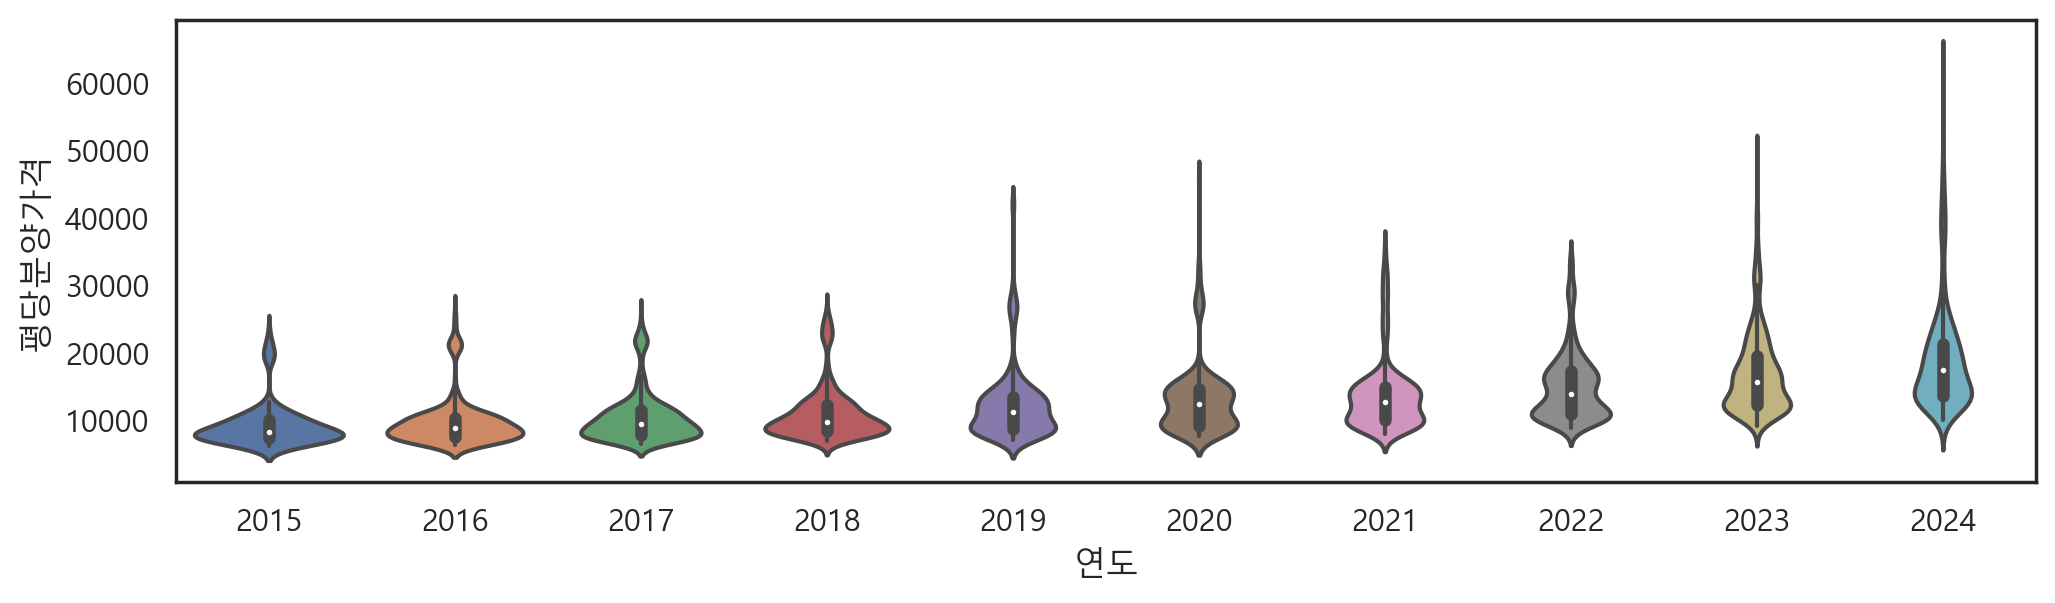

In [65]:
# 문제4)
sns.violinplot(data=df_last, x='연도', y='평당분양가격')
plt.show()

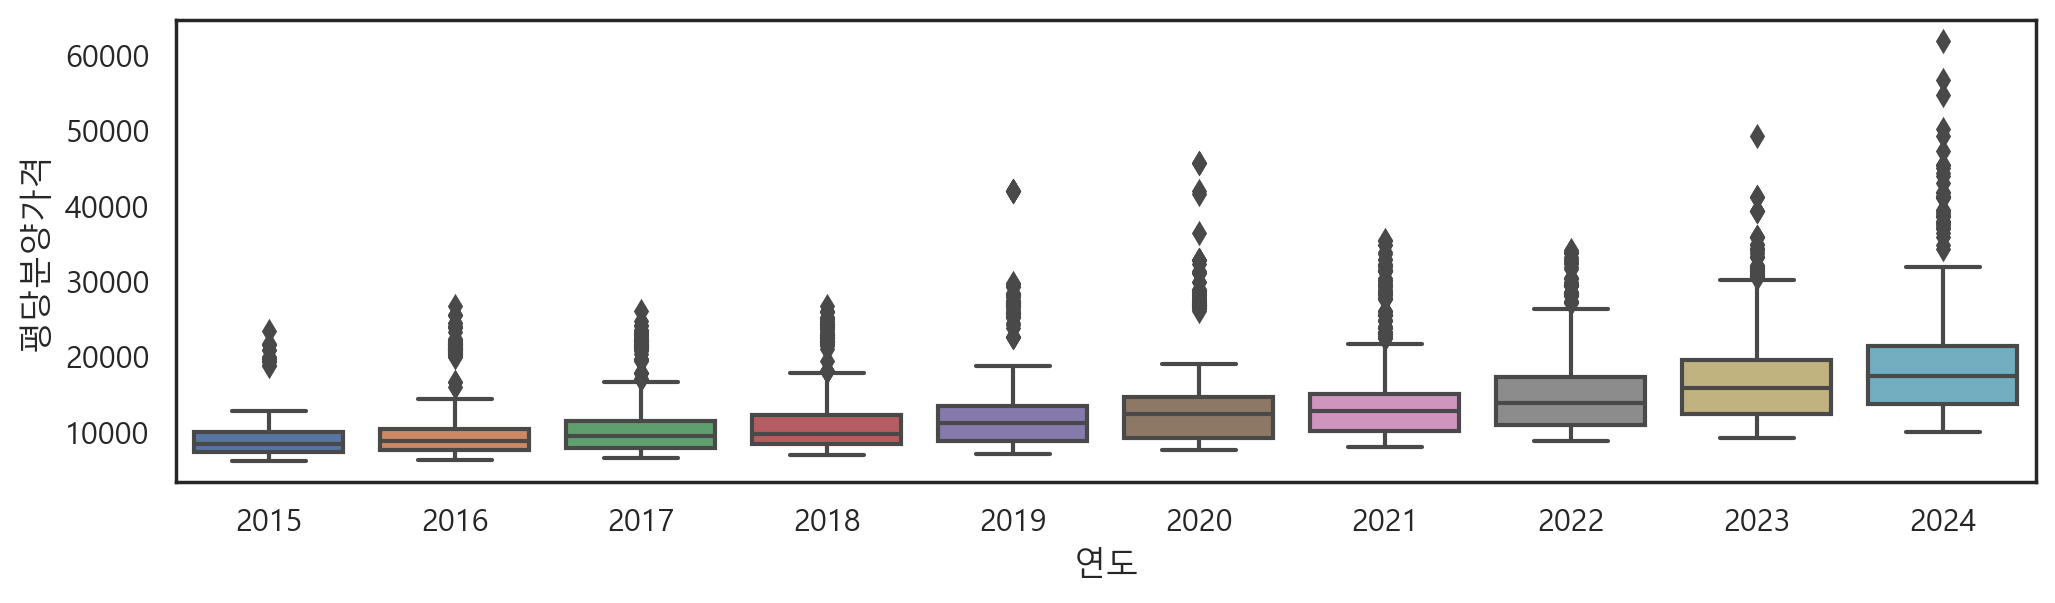

In [66]:
sns.boxplot(data=df_last, x='연도', y='평당분양가격')
plt.show()

In [67]:
# 문제5)
df_first.head()

,지역,2013년12월,2014년1월,2014년2월,2014년3월,2014년4월,2014년5월,2014년6월,2014년7월,2014년8월,...,2014년11월,2014년12월,2015년1월,2015년2월,2015년3월,2015년4월,2015년5월,2015년6월,2015년7월,2015년8월
0,서울,18189,17925,17925,18016,18098,19446,18867,18742,19274,...,20242,20269,20670,20670,19415,18842,18367,18374,18152,18443
1,부산,8111,8111,9078,8965,9402,9501,9453,9457,9411,...,9208,9208,9204,9235,9279,9327,9345,9515,9559,9581
2,대구,8080,8080,8077,8101,8267,8274,8360,8360,8370,...,8439,8253,8327,8416,8441,8446,8568,8542,8542,8795
3,인천,10204,10204,10408,10408,10000,9844,10058,9974,9973,...,10020,10020,10017,9876,9876,9938,10551,10443,10443,10449
4,광주,6098,7326,7611,7346,7346,7523,7659,7612,7622,...,7752,7748,7752,7756,7861,7914,7877,7881,8089,8231


In [69]:
df_first.isna().sum()

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

In [75]:
df_first = df_first.melt(id_vars=['지역'])

In [94]:
df_first.columns

Index(['평당분양가격', '연도월', '지역명'], dtype='object')

In [95]:
df_first.head()

,평당분양가격,연도월,지역명
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [97]:
df_first = df_first.rename(columns={'지역명': '평당분양가격', '평당분양가격': '지역명'})

In [99]:
df_first.head()

,지역명,연도월,평당분양가격
0,서울,2013년12월,18189
1,부산,2013년12월,8111
2,대구,2013년12월,8080
3,인천,2013년12월,10204
4,광주,2013년12월,6098


In [100]:
df_first['연도'] = df_first['연도월'].map( lambda datestr : int(datestr.split('년')[0]))

In [101]:
df_first['월'] = df_first['연도월'].apply( lambda datestr : int(datestr.split('년')[-1][:-1]) )

In [102]:
df_first.head()

,지역명,연도월,평당분양가격,연도,월
0,서울,2013년12월,18189,2013,12
1,부산,2013년12월,8111,2013,12
2,대구,2013년12월,8080,2013,12
3,인천,2013년12월,10204,2013,12
4,광주,2013년12월,6098,2013,12


In [103]:
df_first.drop(['연도월'], axis=1, inplace=True)

In [104]:
df_first.head()

,지역명,평당분양가격,연도,월
0,서울,18189,2013,12
1,부산,8111,2013,12
2,대구,8080,2013,12
3,인천,10204,2013,12
4,광주,6098,2013,12


In [80]:
df_last = df_last.loc[df_last['전용면적'] == '모든면적', ]

In [81]:
df_last.head()

,지역명,연도,월,평당분양가격,전용면적
0,서울,2015,10,19275.3,모든면적
5,인천,2015,10,10437.9,모든면적
10,경기,2015,10,10355.4,모든면적
15,부산,2015,10,10269.6,모든면적
20,대구,2015,10,8850.6,모든면적


In [105]:
df_last.drop(['전용면적'], axis=1, inplace=True)

In [106]:
df_last

,지역명,연도,월,평당분양가격
0,서울,2015,10,19275.3
5,인천,2015,10,10437.9
10,경기,2015,10,10355.4
15,부산,2015,10,10269.6
20,대구,2015,10,8850.6
...,...,...,...,...
9070,전북,2024,8,12058.2
9075,전남,2024,8,13120.8
9080,경북,2024,8,13827.0
9085,경남,2024,8,13252.8


In [107]:
df = pd.concat([df_first, df_last]).reset_index(drop=True)

In [108]:
df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2171,전북,12058.2,2024,8
2172,전남,13120.8,2024,8
2173,경북,13827.0,2024,8
2174,경남,13252.8,2024,8
